In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from coffea import hist, processor
import coffea
import uproot
import sys
sys.path.insert(0,"../")
# from corrections import add_pileup_weight

import mplhep as hep
import pickle
import pandas as pd
import glob

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
from coffea.nanoevents import NanoEventsFactory, BaseSchema
from HMTprocessor.HMTproc import MyProcessor


In [3]:
f = "/uscms/home/kkwok/lpclonglived/HLT/zerobias22/plots_run359694.root"

In [4]:
fileset = {
    'Run359694': [
        "/uscms/home/kkwok/lpclonglived/HLT/zerobias22/plots_run359694.root",
    ]
}

In [5]:
futures_run = processor.Runner(
#     executor = processor.FuturesExecutor(compression=None, workers=2),
    executor = processor.IterativeExecutor(compression=None),    
    schema=BaseSchema,
    maxchunks=10,
)

out = futures_run(
    fileset,
    'simpleCSCshowerFilter/hmt',
    processor_instance=MyProcessor()
)
out

Output()

Preprocessing   0% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/1 [ 0:00:00 < -:--:-- | ? file/s ]

Preprocessing 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/1 [ 0:00:00 < 0:00:00 | ? file/s ]

Output()

Processing   0% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/10 [ 0:00:00 < -:--:-- | ? chunk/s ]

Processing  10% ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/10 [ 0:00:02 < -:--:-- | ? chunk/s ]

Processing  20% ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/10 [ 0:00:05 < 0:00:21 | 0.4 chunk/s ]

Processing  30% ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 3/10 [ 0:00:07 < 0:00:18 | 0.4 chunk/s ]

Processing  40% ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 4/10 [ 0:00:10 < 0:00:16 | 0.4 chunk/s ]

Processing  50% ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 5/10 [ 0:00:13 < 0:00:14 | 0.4 chunk/s ]

Processing  60% ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 6/10 [ 0:00:21 < 0:00:16 | 0.3 chunk/s ]

Processing  70% ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 7/10 [ 0:00:23 < 0:00:11 | 0.3 chunk/s ]

Processing  80% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 8/10 [ 0:00:25 < 0:00:07 | 0.3 chunk/s ]

Processing  90% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 9/10 [ 0:00:27 < 0:00:04 | 0.3 chunk/s ]

Processing 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [ 0:00:29 < 0:00:00 | 0.3 chunk/s ]

{'nClusters': <Hist (sample,nClusters) instance at 0x7fb49b228c10>,
 'eta': <Hist (sample,eta) instance at 0x7fb49bce31d0>,
 'phi': <Hist (sample,phi) instance at 0x7fb49a3e85d0>,
 'size': <Hist (sample,size) instance at 0x7fb49a456c10>,
 'time': <Hist (sample,time) instance at 0x7fb49a446cd0>,
 'nME11_12': <Hist (sample,nME11_12) instance at 0x7fb49a45c690>,
 'x': <Hist (sample,x) instance at 0x7fb49a45ced0>,
 'y': <Hist (sample,y) instance at 0x7fb49bd18210>,
 'z': <Hist (sample,z) instance at 0x7fb49a44dd50>,
 'Nstation10': <Hist (sample,Nstation10) instance at 0x7fb49a44df90>,
 'AvgStation10': <Hist (sample,AvgStation10) instance at 0x7fb49a44dc10>,
 'timeSpread': <Hist (sample,timeSpread) instance at 0x7fb49a44da90>,
 'elctHMT_ME13': <Hist (sample,size) instance at 0x7fb49a44d910>,
 'elctHMT_ME21': <Hist (sample,size) instance at 0x7fb49a44d790>,
 'elctHMT_ME22': <Hist (sample,size) instance at 0x7fb49a44d610>,
 'elctHMT_ME31': <Hist (sample,size) instance at 0x7fb49a44d390>,
 'el

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


<AxesSubplot:xlabel='ClusterSize', ylabel='Events'>

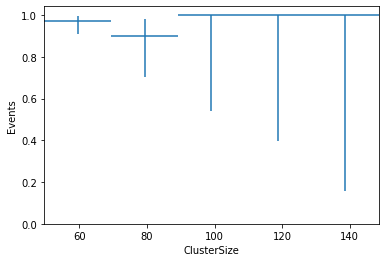

In [9]:
h = out["ME22_12"]
hist.plotratio(num=h.integrate("sample",'numer'),
                   denom=h.integrate("sample",'denom'),
                    xerr=True,
                   error_opts={"linestyle":'none',},
#                    ax=ax,clear=False
                  )